In [1]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans

## Loading Cleaned Shopping Data into Pandas

In [2]:
# Loading data into Pandas
df_shopping = pd.read_csv("https://static.bc-edx.com/mbc/ai/m2/datasets/shopping-data-cleaned.csv")
df_shopping.head()

,Card Type,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Implementing the Elbow Method

In [3]:
# Create an empty list to store the inertia values
inertia = []

# Create a list with the number of k-values to try
k = list(range(1, 11))

In [4]:
# Create a for loop to compute the inertia with each possible value of k and add the values to the inertia list.
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(df_shopping)
    inertia.append(model.inertia_)

In [5]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,308862.060000
1,2,225102.196970
2,3,158538.509237
3,4,104414.675342
4,5,75542.773715
5,6,58364.968600
6,7,51474.618211
7,8,48218.825503
8,9,45896.807552
9,10,42340.347765


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

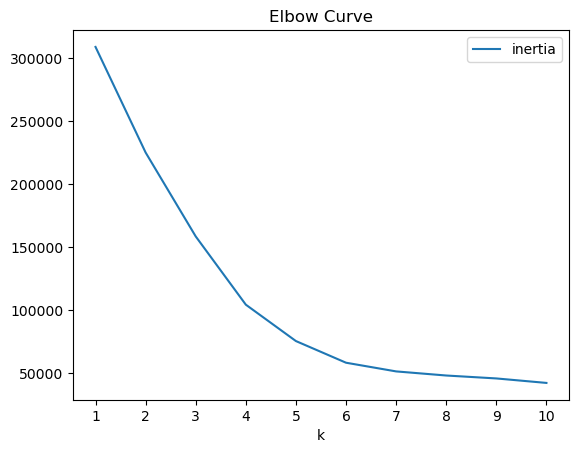

In [6]:
# Plot the Elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

In [7]:
# Determine the rate of decrease between each k value. 
k = elbow_data["k"]
inertia = elbow_data["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 27.12%
Percentage decrease from k=2 to k=3: 29.57%
Percentage decrease from k=3 to k=4: 34.14%
Percentage decrease from k=4 to k=5: 27.65%
Percentage decrease from k=5 to k=6: 22.74%
Percentage decrease from k=6 to k=7: 11.81%
Percentage decrease from k=7 to k=8: 6.33%
Percentage decrease from k=8 to k=9: 4.82%
Percentage decrease from k=9 to k=10: 7.75%


 The rate of decrease in inertia **begins** to slow down between k=4 to k=5, which means that our elbow point is at k=4.